In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import datetime
from src.ProbBidClearing import ProbBidClearing

In [2]:
## Initialize ProbBidClearing Object

std = 10                 # standard deviation 
risky_mean = 20          # bid above RTP
conservative_mean = -15  # bid below RTP

# To Do : add in default initialization
clearer = ProbBidClearing(std, risky_mean, conservative_mean)

### Attitude Based Bidding

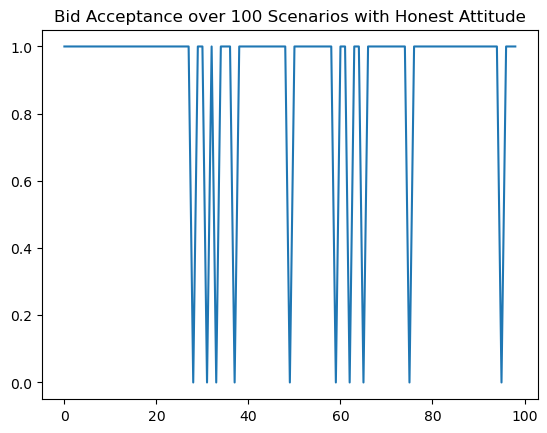

In [4]:
## Test if the discharge bid was accepted

# Sample bidding environment
RTP = 30.02044
bid = 36.13978
SOC = 0.5
attitude = "honest"

accept = []
n = 100

# Test norm prob clear over n scenarios
for i in range(1,n):
    accept.append(clearer.norm_prob_clear(RTP, bid, attitude, SOC))

## Show bid acceptance over scenarios
plt.plot(accept)
plt.title("Bid Acceptance over " + str(n) + " Scenarios with " + attitude.capitalize() + " Attitude")
plt.show()

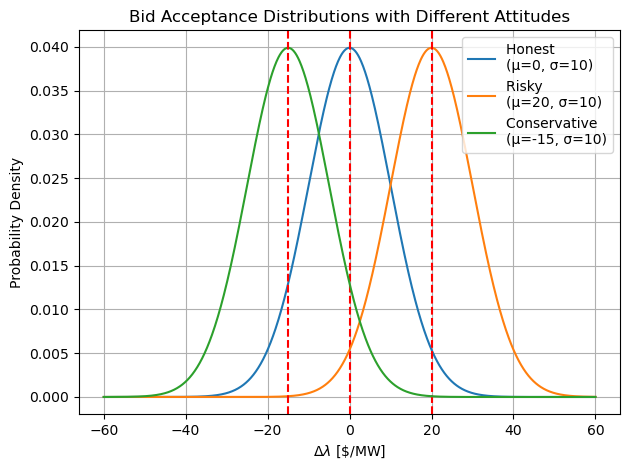

In [5]:
clearer.visualize_norm_attitudes()

### Custom Bidding

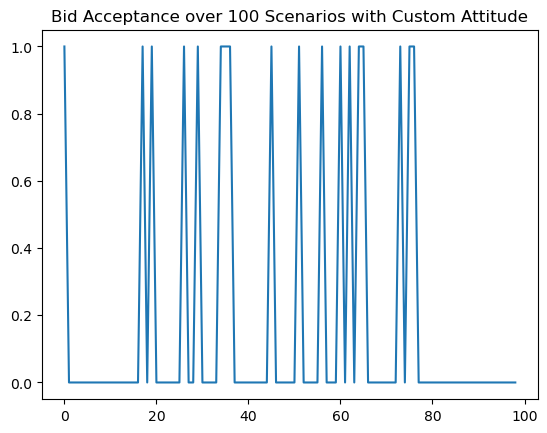

In [7]:
## Test if custom the discharge bid was accepted
bid = 40
mean = 0
std = 5

accept = []
n = 100

for i in range(1,n):
    accept.append(clearer.custom_norm_prob_clear(RTP, bid, SOC, mean, std))

## Show bid acceptance over scenarios
plt.plot(accept)
plt.title("Bid Acceptance over " + str(n) + " Scenarios with Custom Attitude")
plt.show()

### Time-Varying Bidding

#### Data Collection

In [10]:
# Pull dataset
ENERGY_STORAGE_DATA_PATH = (
    "./src/CAISO-EnergyStorage/src/data/ES_BIDS/CAISO_ES_BIDS.parquet"
)

# Read parquet file
STORAGE_DF = pd.read_parquet(ENERGY_STORAGE_DATA_PATH)

# Define rolling average window
win = 10

# Calculate smoothed profile
avg_profile_rolling = clearer.avg_demand_profile(STORAGE_DF, win)

#### Visualization

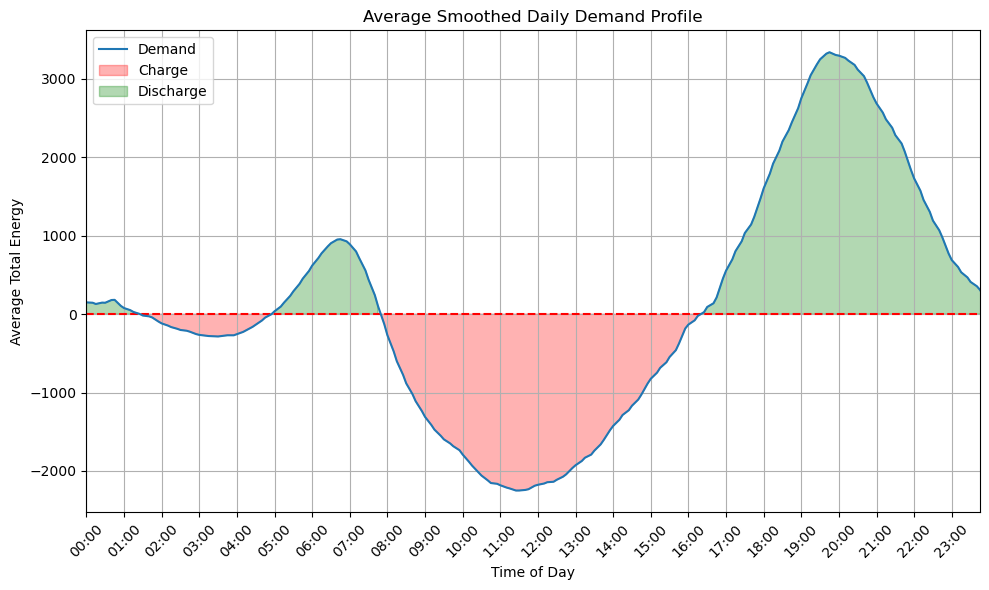

In [12]:
clearer.visualize_avg_demand_profile(avg_profile_rolling)

#### Bidding Environment

In [14]:
# Sample bidding environment
RTP = 50.02044
bid = 55.13978
SOC = 0.5
attitude = "honest"
date_string = '2024-10-01 11:45:00'
ts = datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")


In [15]:
clearer.timevarying_norm_prob_clear(RTP, bid, attitude, SOC, ts, avg_profile_rolling) 

-1